A Comparison Between Linear Regression and Random Forest for the Housing Price Prediction Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("../../Datasets/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
def data_preprocessing(List):
    ret = List
    for col in List.select_dtypes(include="object").columns:
        ret[col] = ret[col].astype("category").cat.codes

    ret = (ret - ret.mean())/(ret.std())

    return ret

In [4]:
df_modified = data_preprocessing(df)
df_modified

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-1.404995
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-1.404995
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,-0.091578
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-1.404995
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-1.404995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.575421,-0.990968,-1.307661,-0.569663,-0.928544,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,-0.553526,1.221840
541,-1.603676,-1.267448,0.047235,-0.569663,-0.928544,-2.463081,-0.464888,-0.733865,-0.219063,-0.678439,-0.805002,-0.553526,-0.091578
542,-1.612845,-0.705273,-1.307661,-0.569663,-0.928544,0.405251,-0.464888,-0.733865,-0.219063,-0.678439,-0.805002,-0.553526,1.221840
543,-1.612845,-1.032440,0.047235,-0.569663,-0.928544,-2.463081,-0.464888,-0.733865,-0.219063,-0.678439,-0.805002,-0.553526,-1.404995


In [5]:
x = df_modified.drop("price", axis=1)
y = df_modified["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

Training and Testing With Linear Regression

In [6]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_predict_lg = linear_regression.predict(x_test)
mse_lg = mean_squared_error(y_test, y_predict_lg)
mse_lg

0.395392463295322

Training and Testing with Random Forest Regression

In [8]:
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_predict_rf = random_forest.predict(x_test)
mse_rf = mean_squared_error(y_test, y_predict_rf)
mse_rf

0.49876077835926563

<Axes: xlabel='Models'>

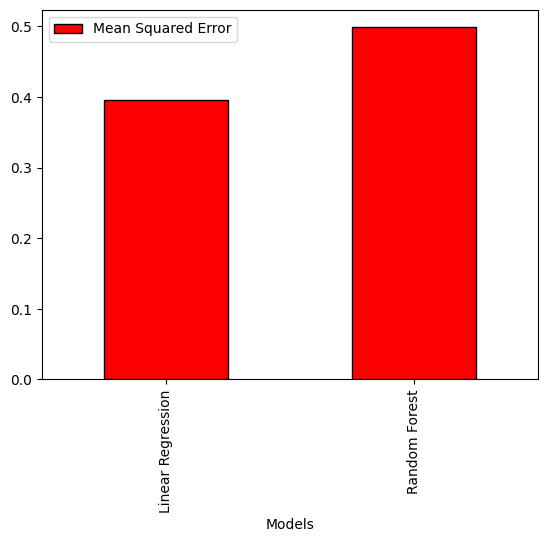

In [10]:
df_mse = pd.DataFrame({
        "Models": ["Linear Regression", "Random Forest"],
        "Mean Squared Error": [mse_lg, mse_rf]
    }
)

df_mse.plot(kind = "bar", x="Models", color = "red", edgecolor = "black")